# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print("preview of merged data:")
print(merged_data.head())

preview of merged data:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [8]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print("number of mice:", num_mice)


number of mice: 249


In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("duplicate mouse IDs for ID and timepoint:")
print(duplicate_mice['Mouse ID'].unique())


duplicate mouse IDs for ID and timepoint:
['g989']


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == duplicate_mouse_id]
print("data for duplicate mouse ID '{}':".format(duplicate_mouse_id))
print(duplicate_mouse_data)

data for duplicate mouse ID 'g989':
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  F

In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']
print("cleaned data:")
print(cleaned_data.head())

cleaned data:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [25]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print("number of unique mice in cleaned dataFrame:", num_mice_cleaned)

number of unique mice in cleaned dataFrame: 248


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print("summary table:")
print(summary_stats)

summary table:
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
print("advanced summary table:")
print(summary_stats_advanced)

advanced summary table:
             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

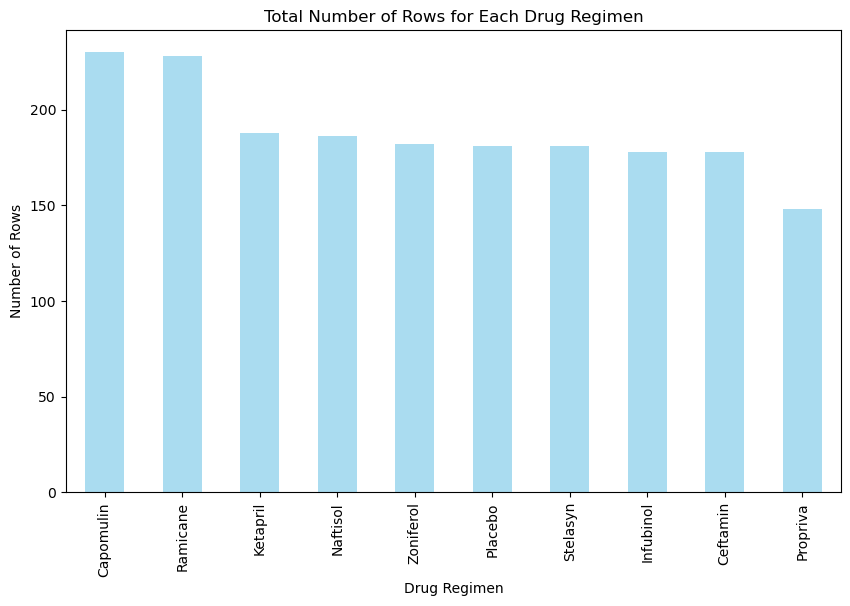

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='skyblue', alpha=0.7, figsize=(10, 6))

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

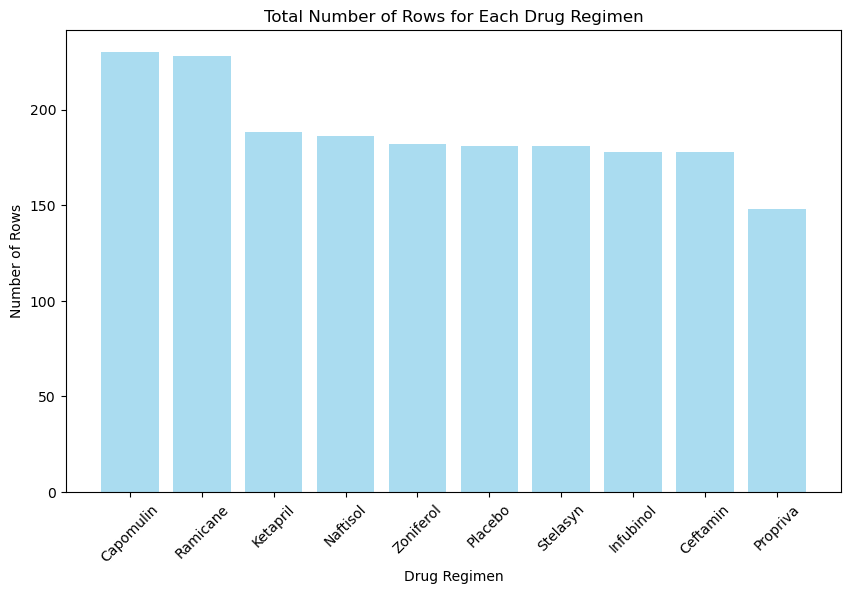

In [27]:
drug_counts = cleaned_data['Drug Regimen'].value_counts()
regimens = drug_counts.index
counts = drug_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.7)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  
plt.show()


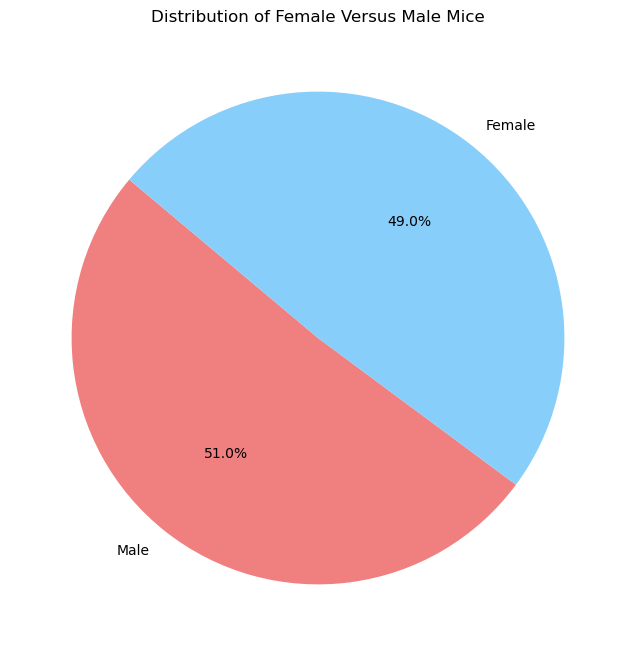

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'], figsize=(8, 8))

plt.title('comparing female vs male')
plt.ylabel('') 
plt.show()

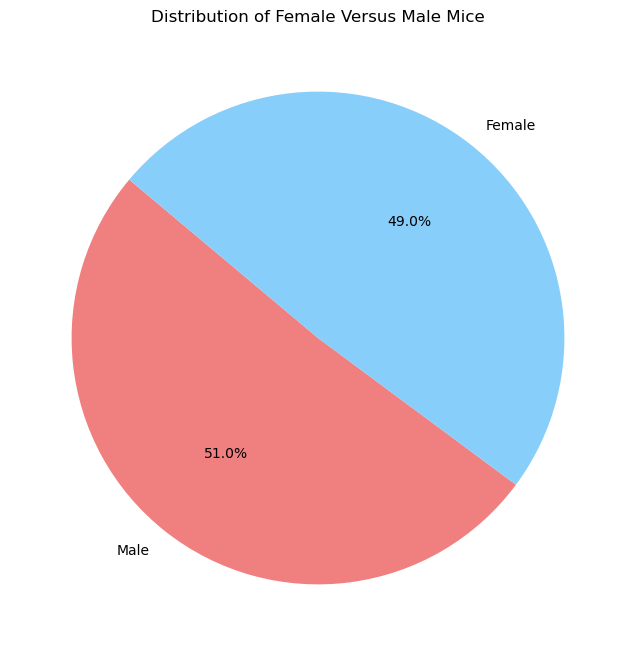

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Female Versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])
four_treatments_final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
print("final tumor volume of each mouse across the four treatment regimens:")
print(four_treatments_final_tumor_volume)

final tumor volume of each mouse across the four treatment regimens:
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
238     y769         45     Ceftamin  Female           6          27   
239     y793         45    Capomulin    Male          17          17   
240     y865         45     Ceftamin    Male          23          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.97341

In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
  lower_quartile = quartiles[0.25]
  upper_quartile = quartiles[0.75]
  iqr = upper_quartile - lower_quartile
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  tumor_volumes = four_treatments_final_tumor_volume.loc[four_treatments_final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
  tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
  lower_bound = lower_quartile - (1.5 * iqr)
  upper_bound = upper_quartile + (1.5 * iqr)
  outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    

NameError: name 'tumor_volumes' is not defined

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes_list = [tumor_volumes for _, tumor_volumes in tumor_volumes_by_regimen.items()]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes_list, labels=treatments, patch_artist=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

NameError: name 'tumor_volumes_by_regimen' is not defined

## Line and Scatter Plots

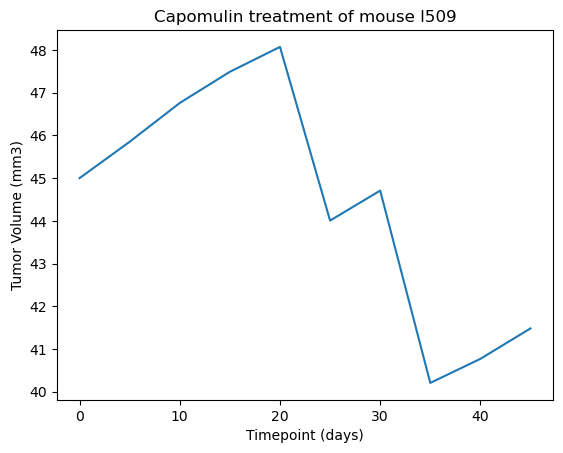

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'  # You can replace 's185' with any mouse ID treated with Capomulin

# Filter the DataFrame for the chosen mouse treated with Capomulin
capomulin_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Adding title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

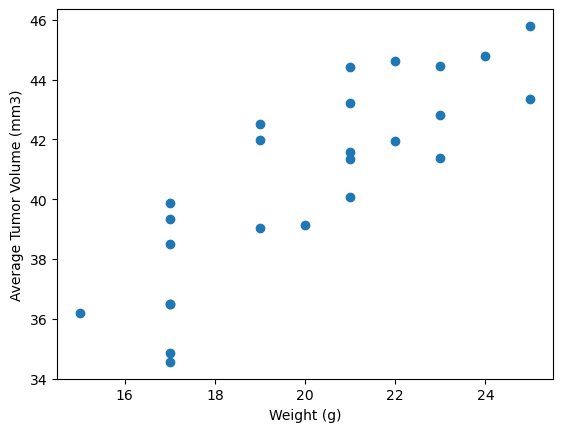

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


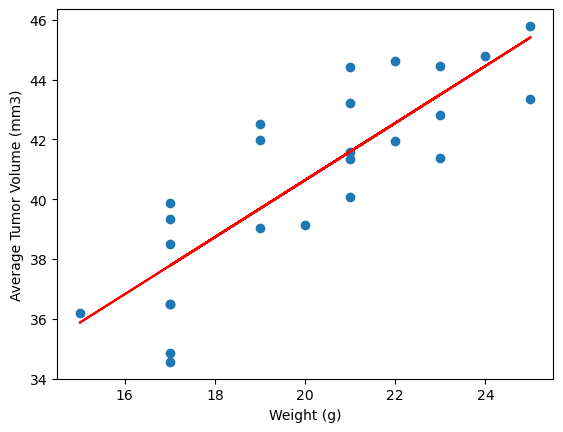

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
